Problem 1
b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def em_step(t, y, dt, f, G): ##same as in example
    
    DW = np.random.normal(size=len(y))    
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)

In [3]:
def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):            
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt
            
        y_list[i,:] = y
        
    return y_list

In [4]:
def f(t,y): ##here we have no drift
    return 0

def G(t,y): ##G is just constant (gamma and sigma set to 1)
    return 1

In [5]:
y0 = np.zeros(5) ##plot 5 trajectories
t = np.linspace(0,1,100)

In [6]:
from time import time

dt = 1e-4

begin = time()
y = eulermaruyama(t, y0, dt, f, G)
end = time()

t_python = end - begin

print("Elapsed: %.2fs" % t_python)

Elapsed: 0.10s


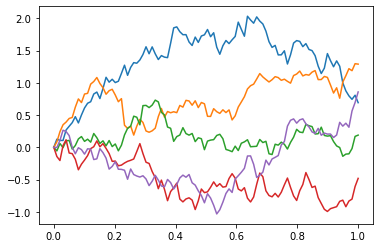

In [7]:
plt.plot(t, y)
plt.show()

c)

Elapsed: 0.10s


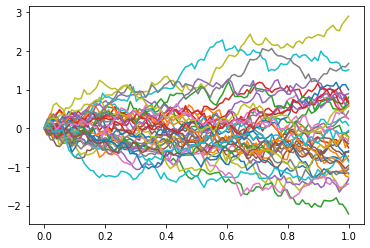

In [8]:
num = 40 ##number of trajectories
y0 = np.zeros(num) 
t = np.linspace(0,1,100)

dt = 1e-4

begin = time()
y = eulermaruyama(t, y0, dt, f, G)
end = time()

t_python = end - begin

print("Elapsed: %.2fs" % t_python)

plt.plot(t, y)
plt.show()


In [9]:
##calculate msd
steps = len(y[:,0]) ##number of steps
msd = np.zeros(steps) ##one value for each time
for i in range(steps):
    msd[i] = 1/steps * np.sum(y[i,:]**2)

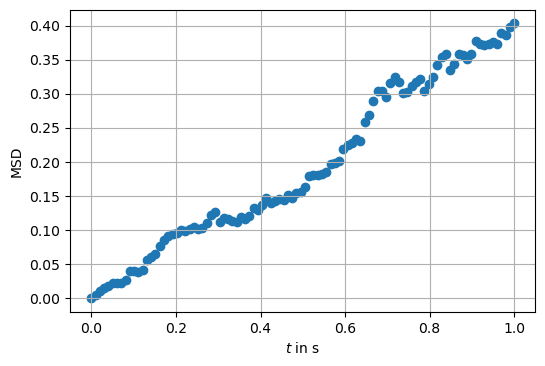

In [10]:
##Plot msd
plt.figure(dpi=100)
plt.xlabel("$t$ in s")
plt.ylabel("MSD")
plt.grid()
plt.scatter(t,msd)

The MSD increases approximately linearly.

Problem 3

Elapsed: 0.11s


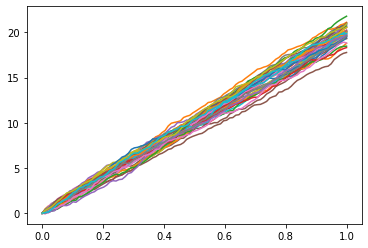

In [11]:
v = 20 ##drift velocity

def f(t,y): ##now we consider constant drift
    return v

def G(t,y): ##G is just constant (gamma and sigma set to 1)
    return 1


## from here on it is the same procedure
num = 40 ##number of trajectories
y0 = np.zeros(num) 
t = np.linspace(0,1,100)

dt = 1e-4

begin = time()
y = eulermaruyama(t, y0, dt, f, G)
end = time()

t_python = end - begin

print("Elapsed: %.2fs" % t_python)

plt.plot(t, y)
plt.show()





In [12]:
##calculate msd
steps = len(y[:,0]) ##number of steps
msd = np.zeros(steps) ##one value for each time
for i in range(steps):
    msd[i] = 1/steps * np.sum(y[i,:]**2)

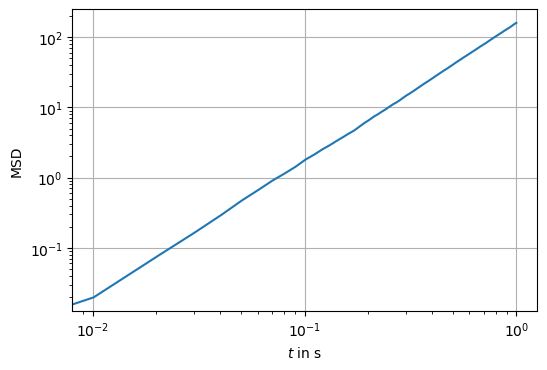

In [13]:
##Plot msd
plt.figure(dpi=100)
plt.xlabel("$t$ in s")
plt.ylabel("MSD")
plt.grid()
plt.loglog(t,msd)

One can see the first, linear regime for $t<10^{-2}$. Afterwards we get a doubling in the slope, corresponding to a quadratic increase of the MSD.

Problem 4

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.linalg import eig

In [26]:
mu = 0.001 #friction
sigmas = [0,0.03, 0.1, 0.3] #noise strength


#use Euler-Maruyama to integrate that baby
#deterministic part
def f(t,y):
    fx = y[1]
    fy = -mu*(y[0]**2-1)*y[1]-y[0]
    return np.array([fx,fy])

#stochastic part
def G(t,y):
    return np.array([[0,0],[0,sigma]])



In [27]:
y0 = np.array([1.5,1.5]) #initial values
total_time = 20 #Total time of trajectories
dt = 1e-2
Num_Step = int(total_time/dt) #Number of Steps
t = np.linspace(0,total_time,Num_Step)

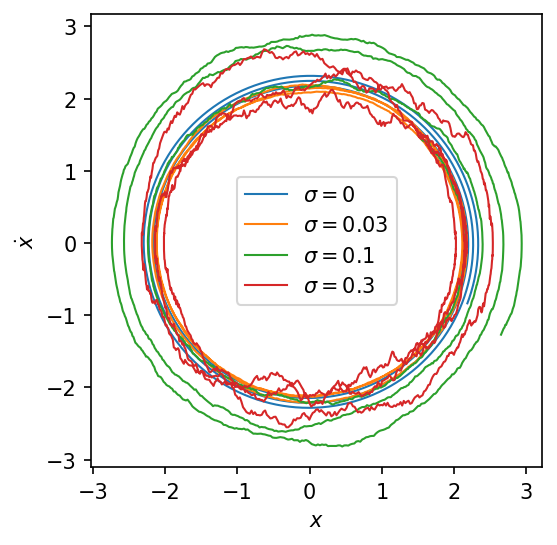

In [28]:
##plot limit cycle

plt.figure(dpi=150)
plt.axes().set_aspect(1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

for i in range(len(sigmas)):
    sigma = sigmas[i]
    sol = eulermaruyama(t, y0, dt, f, G)
    plt.plot(sol[:,0],sol[:,1],lw=1,label="$\sigma={}$".format(sigma))
    plt.legend()
